In [49]:
import numpy as np

In [69]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        raise NotImplementedError

    def backward(self, output_gradient, learning_rate):
        raise NotImplementedError

In [70]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

In [71]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [72]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

In [73]:
class Loss:
    def loss(self, y_true, y_pred):
        raise NotImplementedError()

    def gradient(self, y_true, y_pred):
        raise NotImplementedError()

class MeanSquaredError(Loss):
    def loss(self, y_true, y_pred):
        return np.mean(np.power(y_true - y_pred, 2))

    def gradient(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / y_true.size

In [96]:
class Network(Layer):
    def __init__(self, layers):
        self.layers = layers
    
    def forward(self, input):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def backward(self, output_error, learning_rate):
        for layer in reversed(self.layers):
            output_error = layer.backward(output_error, learning_rate)
        return output_error

class Model:
    def __init__(self, network, loss):
        self.network = Network(network)
        self.loss = loss
    
    def train(self, x_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in zip(x_train, y_train):
                output = self.network.forward(x)
                loss = self.loss.loss(y, output)
                loss_gradient = self.loss.gradient(y, output)
                self.network.backward(loss_gradient, learning_rate)
            print('epoch %d/%d   loss=%f' % (epoch+1, epochs, loss))
    
    def predict(self, x_test):
        if len(x_test.shape) == 1:
            return self.network.forward(x_test.reshape(-1, 1))
        y_pred = []
        for x in x_test:
            y_pred.append(self.network.forward(x.reshape(-1, 1)))
        return np.array(y_pred).squeeze()


epoch 1/1000   loss=0.594342
epoch 2/1000   loss=0.624008
epoch 3/1000   loss=0.636358
epoch 4/1000   loss=0.644378
epoch 5/1000   loss=0.650698
epoch 6/1000   loss=0.655968
epoch 7/1000   loss=0.660390
epoch 8/1000   loss=0.664063
epoch 9/1000   loss=0.667066
epoch 10/1000   loss=0.669473
epoch 11/1000   loss=0.671355
epoch 12/1000   loss=0.672781
epoch 13/1000   loss=0.673811
epoch 14/1000   loss=0.674504
epoch 15/1000   loss=0.674909
epoch 16/1000   loss=0.675071
epoch 17/1000   loss=0.675028
epoch 18/1000   loss=0.674816
epoch 19/1000   loss=0.674462
epoch 20/1000   loss=0.673993
epoch 21/1000   loss=0.673430
epoch 22/1000   loss=0.672791
epoch 23/1000   loss=0.672093
epoch 24/1000   loss=0.671347
epoch 25/1000   loss=0.670566
epoch 26/1000   loss=0.669759
epoch 27/1000   loss=0.668933
epoch 28/1000   loss=0.668095
epoch 29/1000   loss=0.667250
epoch 30/1000   loss=0.666403
epoch 31/1000   loss=0.665557
epoch 32/1000   loss=0.664715
epoch 33/1000   loss=0.663879
epoch 34/1000   los

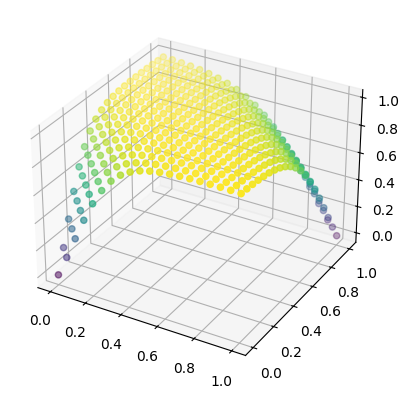

In [103]:
import matplotlib.pyplot as plt

X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

model = Model(network, MeanSquaredError())
model.train(X, Y, 1000, 0.1)

points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = model.predict(np.array([x, y]))
        points.append([x, y, z[0,0]])

points = np.array(points)

# 3 d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c=points[:,2])
plt.show()